In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cbook=pd.read_csv('Technology_Access_and_Adoption_Survey_2018_Codebook.csv')
cbook.sample(10)

,Name,StandardAttribute,Weight,Value,Label
1608,q16a_4,Q16_4. How often does anyone in your household...,Household,1.0,Daily
95,q2ba_4,Q2BA_4. Thinking about each type of device you...,Household,4.0,Borrowing
972,q11a_9,Q11A_9. Please tell us where you personally ha...,Individual,12.0,Not applicable
2976,without_internet_subscription,Q4 Without Internet Subscription,Household,1.0,Yes
2322,q27bc_1,Q27BC_1. School attend - 1st grade to 5th grade,Household,3.0,Private School
1240,q11c_7,Q11C_7. Please tell us where children in your ...,Household,0.0,NO RESPONSE
230,q3,"Q3. Of all of the devices you have access to, ...",Individual,7.0,Don't access the internet where I live
2960,fixed_broadband_subscription,Q4 Fixed Broadband Subscription,Household,1.0,Yes
2922,internetincomepercentcat,Income percent spent on internet - categories,Household,2.0,1% - 1.99%
2344,q27bd_2,Q27BD_2. School attend - 6th grade to 8th grade,Household,0.0,NO RESPONSE


### All unique survey questions

In [44]:
cbook['StandardAttribute'].apply(lambda x:x.split('.')[-1].split('-')[0].strip()).unique()

array(['ID', 'Sample Group', 'qzip', 'Council District', '',
       'Does your household have a way to access the internet in the place where you currently live?',
       'Does your household have one or more of each of these?',
       'Thinking about each type of device you have in the place where you live; own device?',
       'Thinking about each type of device you have in the place where you live; how did your household get each type of device?  Desktop computer',
       'Thinking about each type of device you have in the place where you live; how did your household get each type of device?  Laptop computer',
       'What are all the ways you get internet in the place where you live?',
       'Relationship',
       'Thinking about each type of device you have in the place where you live; how did your household get each type of device?  Smartphone or mobile phone',
       'Thinking about each type of device you have in the place where you live; how did your household get each type o

In [3]:
sur_data=pd.read_csv('Technology_Access_and_Adoption_Survey_2018.csv')
sur_data.sample(10)

C:\Users\sadhi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (105) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,samplegroup,qzip,CD,l,q1,q2a_1,q2a_2,q2a_3,q2a_4,...,have_data_cell_plan,only_data_cell_plan,free_access_net,free_access_and_paid_subscription,other_access,without_internet_subscription,free_access_and_no_paid_sub,no_internet_access,unknown_service,no_response
1686,2051,3,98115,4,NaN,2,7,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3524,111,1,98115,4,9.0,1,1,2,3,4,...,1,0,0,0,0,0,0,0,0,0
136,793,5,0,8,NaN,2,0,0,3,0,...,0,0,0,0,0,1,0,1,0,0
1502,2314,1,98115,4,NaN,1,0,2,3,4,...,0,0,0,0,0,0,0,0,0,0
186,3267,2,98133,5,NaN,1,0,2,3,4,...,1,0,0,0,0,0,0,0,0,0
1691,2058,1,98146,1,NaN,1,0,0,3,0,...,1,1,0,0,0,0,0,0,0,0
2211,3941,1,98102,3,NaN,1,0,2,3,0,...,0,0,0,0,0,0,0,0,0,0
1440,2360,1,98119,7,NaN,1,0,2,3,0,...,1,0,0,0,0,0,0,0,0,0
3147,1133,2,98118,2,9.0,1,2,3,4,5,...,1,0,0,0,0,0,0,0,0,0
770,2688,4,98108,2,9.0,1,1,2,3,0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
sur_data.query("samplegroup==1 or samplegroup==2")['q1'].value_counts(dropna=False)

1    3194
2     128
Name: q1, dtype: int64

In [5]:
sur_ppl=sur_data.query("samplegroup==1 or samplegroup==2")

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1. What is the most preferable mode of business?

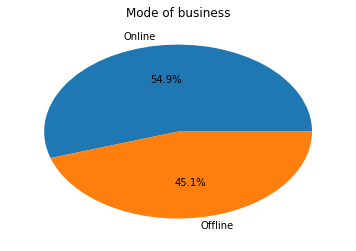

In [189]:
ax=sur_ppl[(sur_ppl['q35_1']==3) & sur_ppl['q16c_18'].isin([1,5])]['q16c_18'].value_counts().plot(kind='pie',labels=['Online','Offline'],autopct='%1.1f%%',title='Mode of business')
ax.set_ylabel('')
plt.savefig('mob.png')

### 2. Does running Business online makes you rich?

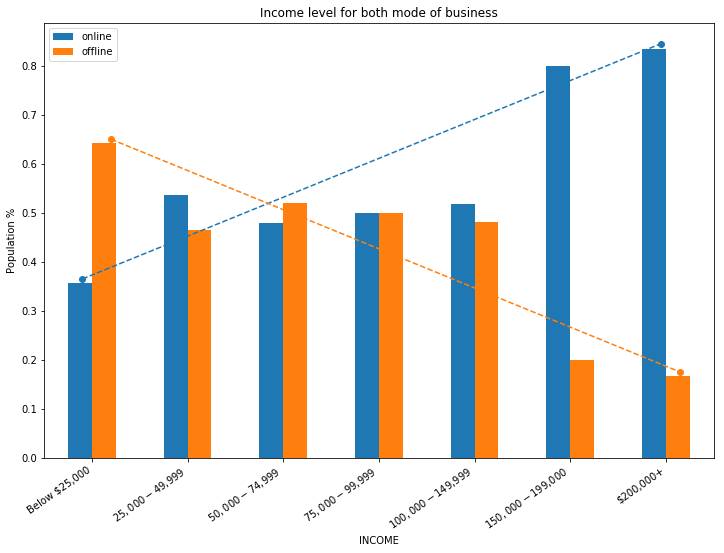

In [208]:
qryd=sur_ppl.query("q35_1==3 and INCOME!=0 and (q16c_18==1 or q16c_18==5)")
ax=pd.crosstab(qryd['INCOME'],qryd['q16c_18'],normalize='index').plot(kind='bar',title="Income level for both mode of business",figsize=(12,8))#xticks=)
ax.legend(['online','offline'])
plt.plot([-0.1,5.95],[0.365,0.845],'--o')
plt.plot([0.2,6.15],[0.65,0.175],'--o')
ax.set_ylabel("Population %")
ax.set_xticklabels(['Below $25,000','$25,000-$49,999','$50,000-$74,999','$75,000-$99,999','$100,000-$149,999','$150,000-$199,000','$200,000+'],rotation=35,horizontalalignment='right')
plt.savefig("Income_level.png")

### 3. But what concerns them not to use internet for business?

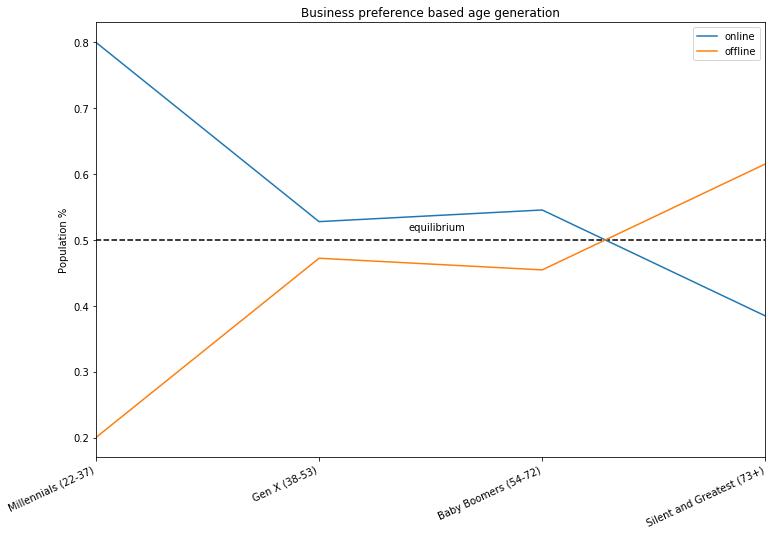

In [262]:
qry2=sur_ppl.query("q35_1==3 and INCOME!=0 and (q16c_18==1 or q16c_18==5)")
ax=pd.crosstab(qry2['Age_range3'],qry2['q16c_18'],normalize='index').plot(title="Business preference based age generation",figsize=(12,8))
ax.legend(['online','offline'])
plt.locator_params(axis='x', nbins=4)
ax.hlines(0.5, 1,5, linestyles='dashed')
ax.annotate('equilibrium',(3.4,0.515))
ax.set_ylabel("Population %")
ax.set_xlabel(" ")
ax.set_xticklabels(['Millennials (22-37)','Gen X (38-53)','Baby Boomers (54-72)','Silent and Greatest (73+)'],rotation=25,horizontalalignment='right')
plt.savefig("Age_on_off.png")

### 4. Does knowledge in Technology helps creating wealth?

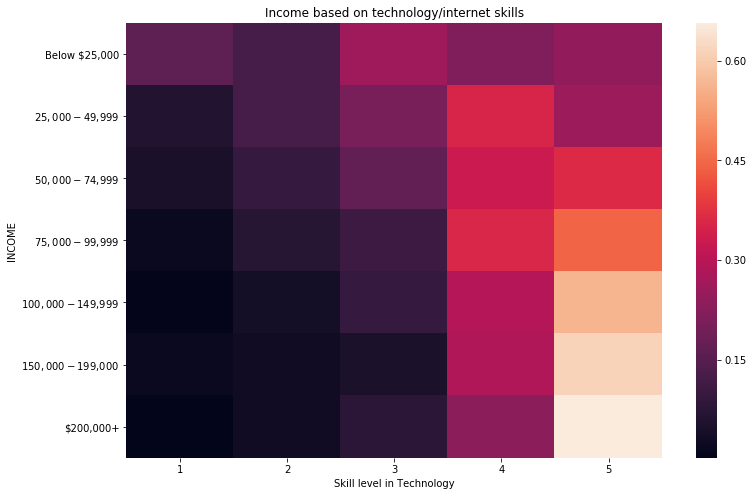

In [309]:
plt.figure(figsize = (12,8))
ax=sns.heatmap(pd.crosstab(sur_ppl.query("q21a_3R!=0 and INCOME!=0")['INCOME'],sur_ppl.query("q21a_3R!=0 and INCOME!=0")['q21a_3R'],normalize='index')
   )
plt.title('Income based on technology/internet skills')
#plt.figsize=(12,8)
ax.set_yticklabels(['Below $25,000','$25,000-$49,999','$50,000-$74,999','$75,000-$99,999','$100,000-$149,999','$150,000-$199,000','$200,000+'],rotation=0,horizontalalignment='right')
#ax.set_xticklabels(['Very low','$25,000-$49,999','$50,000-$74,999','$75,000-$99,999','$100,000-$149,999','$150,000-$199,000','$200,000+'],rotation=0,horizontalalignment='right')
ax.set_xlabel("Skill level in Technology")
plt.savefig("income_tech_skill.png")

## APPENDIX

In [ ]:
### technology preference is influenced by the privacy and information theft issues

In [209]:
pd.crosstab(sur_ppl['q21b_7'],sur_ppl['q21b_8'])

q21b_8,0,1,2,3,4,5
q21b_7,,,,,,
0,59,5,4,1,1,2
1,4,194,269,169,118,74
2,2,108,420,362,401,162
3,1,34,126,138,173,61
4,0,10,43,78,126,73
5,0,6,12,12,17,57


In [6]:
pd.crosstab(sur_ppl['EDUC'],sur_ppl['INCOME'])

INCOME,0,1,2,3,4,5,6,7
EDUC,,,,,,,,
0,14,3,2,1,0,3,0,2
1,4,22,3,3,1,1,1,1
2,93,170,174,97,71,64,31,19
3,368,115,271,307,311,483,255,353
8,54,14,3,3,1,2,0,2


In [7]:
pd.crosstab(sur_ppl['EDUC'],sur_ppl['q21a_4'])

q21a_4,0,1,2,3,4,5
EDUC,,,,,,
0,7,1,2,5,4,6
1,2,6,7,13,2,6
2,21,81,131,153,149,184
3,37,96,311,335,681,1003
8,5,14,8,19,19,14


In [98]:
sur_ppl[sur_ppl['q16c_18'].isin([1,5])][['q16c_18','q13_1','q13_2','q13_3','q13_4','q13_5','q13_6','q13_7','q13_8','q13_9']]

,q16c_18,q13_1,q13_2,q13_3,q13_4,q13_5,q13_6,q13_7,q13_8,q13_9
0,5,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,5,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,5,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,5,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
